In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
df = pd.read_csv("olx_iphone.csv")
df["Date"] = df["Date"].astype("datetime64[ns]")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     1299 non-null   object        
 1   Price     1299 non-null   float64       
 2   City      1299 non-null   object        
 3   Bargain   1299 non-null   bool          
 4   Date      1299 non-null   datetime64[ns]
 5   District  815 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 52.1+ KB
None


,Title,Price,City,Bargain,Date,District
0,"iPhone 15 128 gb, 256 gb. Айфон 15 128 гб и 25...",315000.0,Алматы,False,2024-12-08,Алмалинский район
1,Iphone 12 pro max 256gb,160000.0,Петропавловск,False,2024-12-09,NaN
2,iPhone 13(128GB-Akb 100%),185000.0,Уральск,True,2024-12-09,2-й рабочий
3,Iphone 11 128gb с гарантией,30000.0,Алматы,False,2024-12-10,Алмалинский район
4,Iphone 11 128gb с гарантией,30000.0,Усть-Каменогорск,False,2024-12-10,Микрорайон 22
...,...,...,...,...,...,...
1294,Новый чехол на iPhone 14 pro,2000.0,Темиртау,False,2024-12-10,NaN
1295,Iphone 12 pro 128 gold,350000.0,Атырау,False,2024-12-09,Авангард
1296,Продам чехол на IPhone 12,1000.0,Караганда,False,2024-11-30,Казыбекбийский район
1297,Iphone 11 pro(айфон 11 про ),155000.0,Костанай,False,2024-12-09,NaN


## Data cleaning 

In [6]:
df.sort_values(["Price"]).head(10)

,Title,Price,City,Bargain,Date,District
462,Разблокировка Iphone Ipad,0.0,Астана,False,2024-11-13,Сарыаркинский район
349,"Ремонт телефонов, Дисплеи, Стекла, Iphone Xiao...",0.0,Алматы,False,2024-12-09,Ауэзовский район
555,Iphone XS 256Gb обмен,0.0,Алматы,False,2024-12-10,Бостандыкский район
1051,Срочный ремонт телефонов любой сложности Apple...,0.0,Астана,False,2024-12-10,Есильский район
354,Iphone xs max 4/256 100%,0.0,Усть-Каменогорск,False,2024-12-10,45-я аптека
107,iphone 11 64/4 обмен,0.0,Тараз,False,2024-12-10,1-мкр. Акбулак
777,Ремонт Дисплеи Стекла телефонов Iphone Xiaomi ...,0.0,Алматы,False,2024-12-09,Ауэзовский район
362,"Ремонт, продажа запчастей , Iphone , Samsung",0.0,Актау,False,2024-11-24,1
541,Iphone 7 plus обмен,0.0,Туркестан,False,2024-12-10,NaN
562,iPhone 11 айфон 11,0.0,Алматы,False,2024-12-10,Ауэзовский район


In [13]:
def clean_title(title):
    match = re.search(r'iPhone\s\d{1,2}(?:\sPro\sMax|\sPro)?\s\d+(?:GB|gb|TB|tb)?', title, re.IGNORECASE)
    return match.group(0) if match else None

In [16]:
df['Title'] = df['Title'].apply(clean_title)

In [18]:
df_cleaned = df[df['Title'].notnull()]

In [19]:
df_cleaned.head()

,Title,Price,City,Bargain,Date,District
0,iPhone 15 128,315000.0,Алматы,False,2024-12-08,Алмалинский район
1,Iphone 12 pro max 256gb,160000.0,Петропавловск,False,2024-12-09,NaN
3,Iphone 11 128gb,30000.0,Алматы,False,2024-12-10,Алмалинский район
4,Iphone 11 128gb,30000.0,Усть-Каменогорск,False,2024-12-10,Микрорайон 22
5,Iphone 13 128GB,160000.0,Алматы,False,2024-12-10,Алмалинский район


In [27]:
df_cleaned = df_cleaned.fillna({'Title': 'Unknown', 'Price': 0, 'City': 'Unknown', 'Bargain': False, 'Date': 'Unknown', 'District': 'Unknown'})

In [28]:
df_cleaned.to_csv('cleaned_olx_iphone.csv', index=False, encoding='utf-8-sig')

In [29]:
df_cleaned.sort_values(["Price"]).head(10)

,Title,Price,City,Bargain,Date,District
407,Iphone 14 128,0.0,Астана,False,2024-12-10,Есильский район
107,iphone 11 64,0.0,Тараз,False,2024-12-10,1-мкр. Акбулак
426,Iphone 14 256,0.0,Астана,False,2024-12-10,Алматинский район
37,Iphone 12 pro 128gb,0.0,Павлодар,False,2024-12-10,Unknown
1135,iphone 14 pro max 3,3000.0,Алматы,False,2024-12-10,Бостандыкский район
1047,iPhone 16 pro 15,15000.0,Алматы,False,2024-12-09,Жетысуский район
283,iPhone 6 32GB,20000.0,Астана,False,2024-12-10,Есильский район
1237,IPhone 8 64gb,25000.0,Мухаметжан Туймебаева,True,2024-12-10,Unknown
165,Iphone 11 128gb,30000.0,Павлодар,False,2024-12-10,Unknown
12,Iphone 11 128gb,30000.0,Кокшетау,False,2024-12-10,Первая аптека


## Visualization 

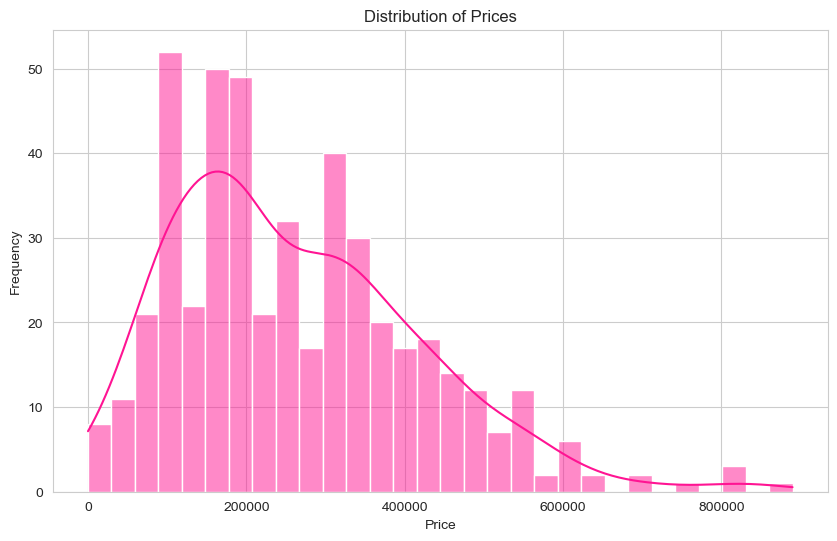

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Price'], bins=30, kde=True, color='#FF1493')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

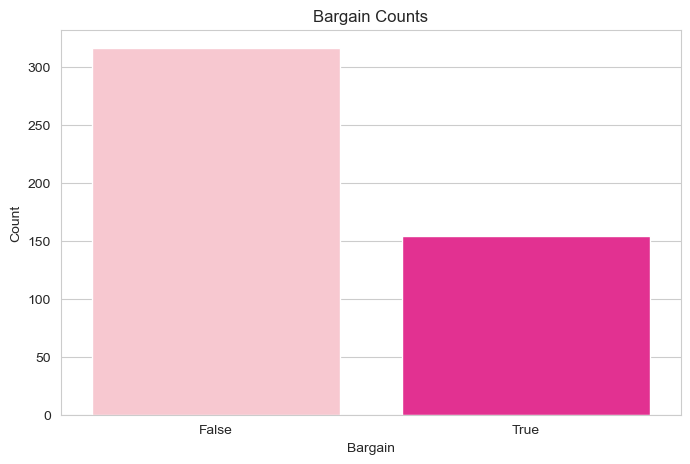

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Bargain', data=df_cleaned, hue='Bargain', dodge=False, palette=['pink', '#FF1493'])  
plt.title('Bargain Counts')
plt.xlabel('Bargain')
plt.ylabel('Count')
plt.legend([], [], frameon=False) 
plt.show()

/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_70646/1794187979.py:15: UserWarning: 
The palette list has fewer values (10) than needed (67) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='City', y='Price', data=df_cleaned, palette=pink_gradient, hue='City')
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_70646/1794187979.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_70646/1794187979.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot


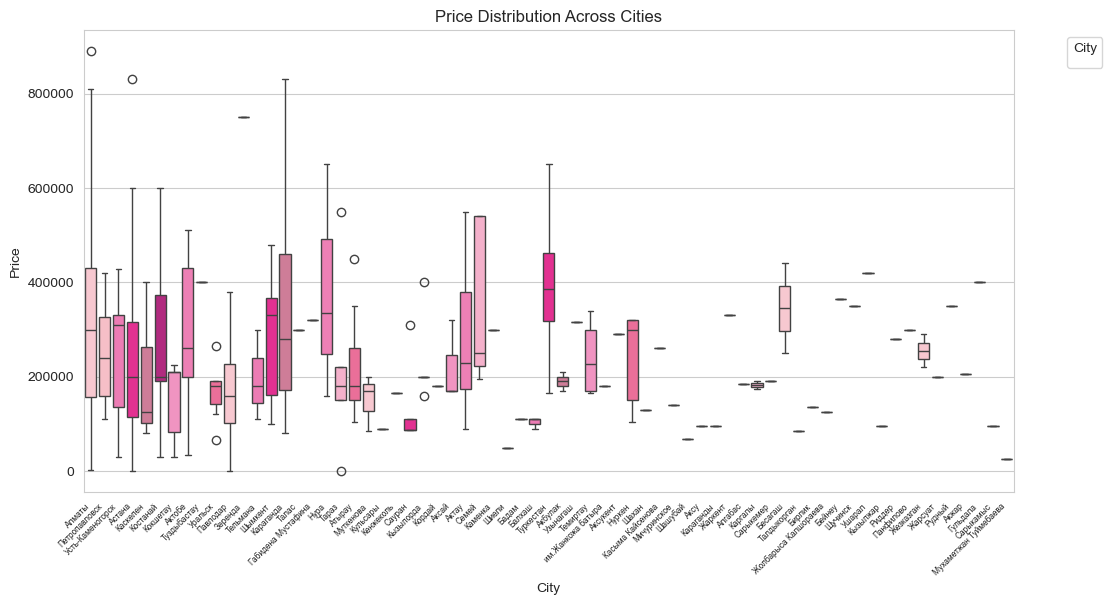

In [45]:
pink_gradient = sns.color_palette([
    "#FFC0CB",  # Light Pink
    "#FFB6C1",  # Light Pink 2
    "#FF69B4",  # Hot Pink
    "#FF1493",  # Deep Pink
    "#DB7093",  # Pale Violet Red
    "#C71585",  # Medium Violet Red
    "#FF85C1",  # Bright Pink
    "#FF6EB4",  # Neon Pink
    "#FFA6C9",  # Pastel Pink
    "#FF5A92"   # Vibrant Pink
])

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='City', y='Price', data=df_cleaned, palette=pink_gradient, hue='City')
plt.title('Price Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.show()


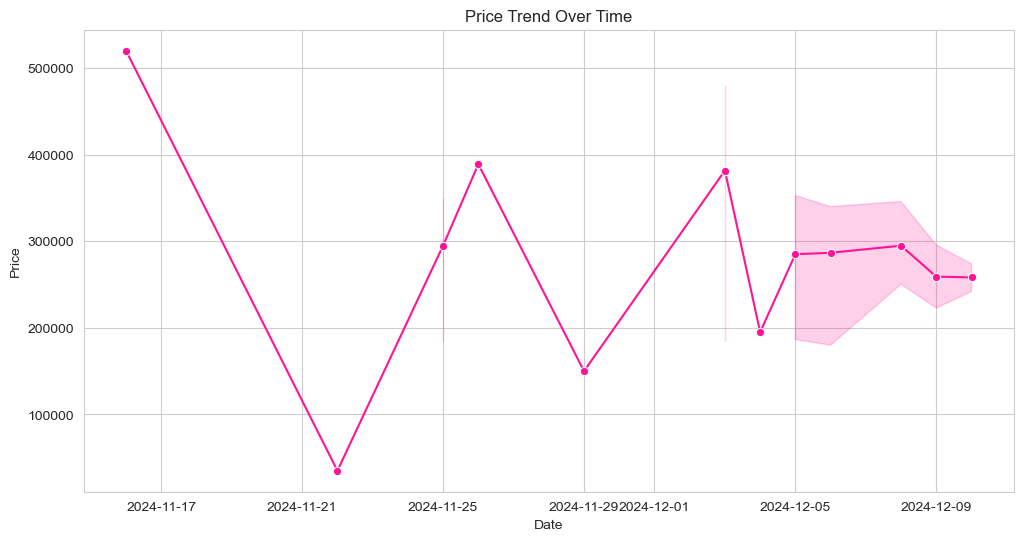

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df_cleaned, marker='o', color='#FF1493')  # Pink color
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_70646/3371053489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_70646/3371053489.py:4: UserWarning: 
The palette list has fewer values (6) than needed (61) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)


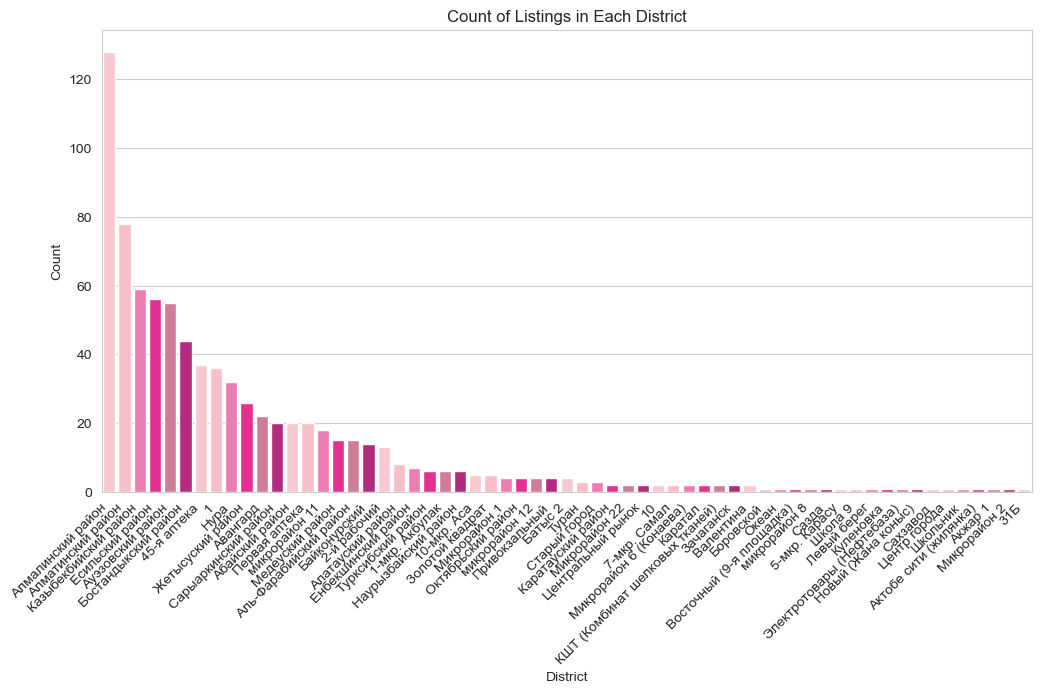

In [48]:
pink_palette = sns.color_palette(["#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"])

plt.figure(figsize=(12, 6))
sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)
plt.title('Count of Listings in Each District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

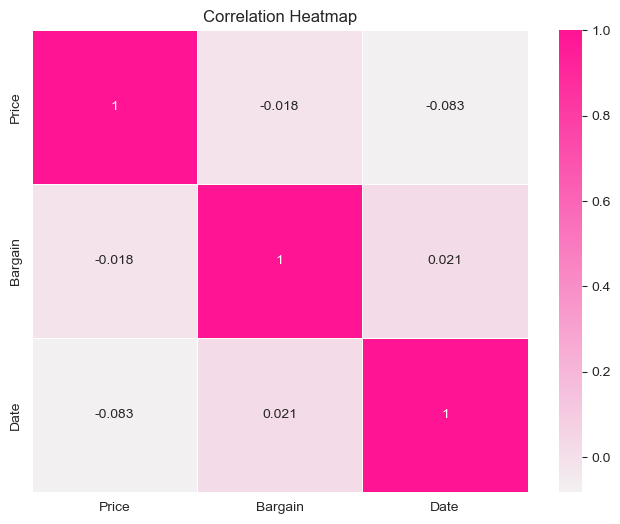

In [51]:
correlation_matrix = df_cleaned[["Price","Bargain","Date"]].corr()

pink_colormap = sns.light_palette("#FF1493", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=pink_colormap, linewidths=0.5)  # Custom pink gradient
plt.title('Correlation Heatmap')
plt.show()

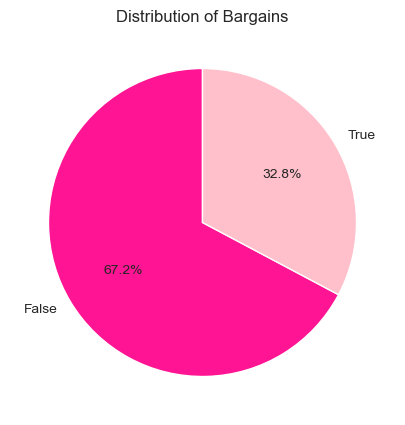

In [52]:
plt.figure(figsize=(10, 5))
bargain_counts = df_cleaned['Bargain'].value_counts()
plt.pie(
    bargain_counts,
    labels=bargain_counts.index,
    autopct='%1.1f%%',
    colors=['#FF1493', '#FFC0CB'], 
    startangle=90
)
plt.title('Distribution of Bargains')
plt.show()

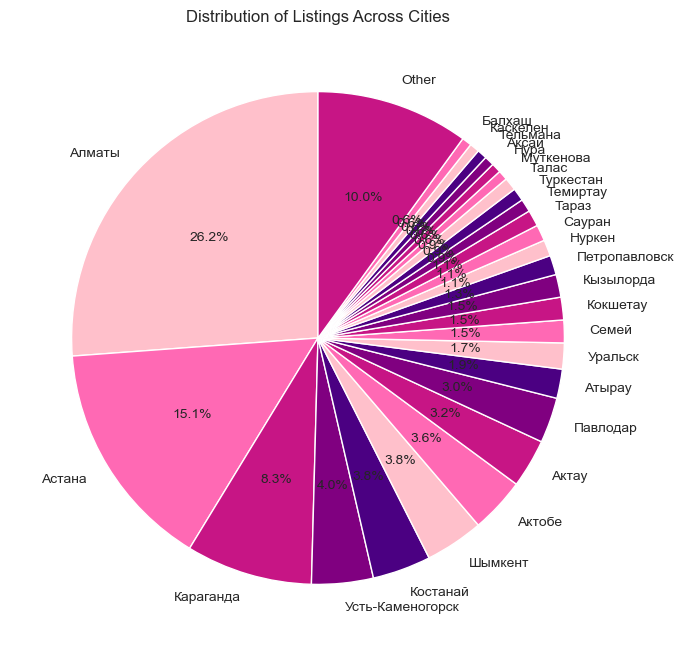

In [53]:
pink_purple_palette = sns.color_palette(["#FFC0CB", "#FF69B4", "#C71585", "#800080", "#4B0082"])

# Filter city counts and add 'Other' category
city_counts = df_cleaned['City'].value_counts()
threshold = 0.005  # Define a threshold for grouping smaller parts

# Creating a new category 'Other' for cities with a percentage below the threshold
city_counts['Other'] = city_counts[city_counts / city_counts.sum() < threshold].sum()
city_counts = city_counts[city_counts / city_counts.sum() >= threshold]

# Pie chart for City distribution
plt.figure(figsize=(10, 8))
plt.pie(
    city_counts,
    labels=city_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=pink_purple_palette  # Apply the pink-to-purple palette
)
plt.title('Distribution of Listings Across Cities')
plt.show()